# Linear Regression 

Fitting a line using linear regression 

    Y = wX + b ~ f(x)  

where f is a linear function of x 

Solve for w and b 


Cost Function: minimizing the loss between ground truth Y and predictions f(x) over all the samples. 

Loss can be L2 or L1 norm (to encourage sparsity) 

Cost Function = 
                
                sum over samples loss(Y_i , f(x_i)) = 

                sum((f(x_i) - y_i))^2 => Normalized
                
                1/(2 * m) sum((f(x_i) - y_i)^2) , where m is the number of samples 
                
To find w and b the cost function is minimized in a closed form or using gradient descent algorithm. Linear regression solves a convex function, local minimum is a global minimum. 

Parameters of the model are updated simultaneously. 

    temp_w = w - alpha * d/dw(cost function)

    temp_b = b - alpha * d/dw(cost function)

    w = temp_w

    b = temp_b
    

d(cost function)/dw is the derivative of the cost function with respect to w and alpha is the learning rate. 

Consider the cost function to be the norm 2 and Y = wX + b , 

    J(w,b) = 1/(2 * m) * sum((w * X_i + b) -Y_i)^2


dJ/dw = 

        1 / (2 * m) * sum( ((w * X_i + b) - y_i)  * 2 * X_i )  = 
        1 / m * sum( ((w * X_i + b) - Y_i)  * X_i ) 
        
dJ/db = 

        1 / (2 * m) * sum( ((w * X_i + b) - y_i)  * 2 )  = 
        1 / m * sum( ((w * X_i + b) - Y_i) ) 
        
        
Gradient descent is then, 

    W = W - alpha * dJ/dw

    b = b - alpha * dJ/db

Gradient descent can be ran until the number of iterations is reached, or the cost function goes below a threshold, or perhaps, the change in cost function is minimum, i.e., model isn't learning. 

Instead of using for loops, we can employ numpy to vectorize the implementations. 

    Y = np.dot(w,X) + b 

And cost function is also a function of X and Y as vectors, instead of a a list of samples. 

If Y was a function multiple features our implementation of linear regression simply generalizes by performing gradident descent with respect to each feature. 

    W_1 = W_1 - alpha * dJ/dw_1

    W_2 = W_2 - alpha * dJ/dw_2

The cost function can also be regularized using norm 2 or norm 1, this will further update the gradient descent. 

    J(w,b) = 1/(2 * m) * sum(((w * X_i + b) -Y_i)^2 ) + (gamma/2 * sum(w^2))

    dJ/dw = 1 / m * sum( ((w * X_i + b) - Y_i)  * X_i ) + (gamma* sum(w))
    
With respect to b, 

    dJ/db = 1 / m * sum( ((w * X_i + b) - Y_i))

Where gamma is the regularization factor. 

Closed form solution  can be derived by solving for W directly, 

    W = (X * X.T)^-1 * X * Y.T


In [1]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd

In [2]:
class LinearRegression():
    
    def __init__(self, iteration= 50, learning_rate=0.01, threshold = 0.01, gamma = 0.01):
        self.iter_ = iteration
        self.lr = learning_rate
        self.thr = threshold
        self.gamma = gamma
        self.costs = []
        
    def fit(self, X, Y, W, b):
        m,k = X.shape # num samples x num featurees
        m =  len(Y)
        X = X.reshape(m,k)
        Y = Y.reshape(m,1)
        for i in range(self.iter_):
            y_pred = X.dot(W) + b
            loss = (y_pred - Y)
            w_error = np.dot(X.T, loss)
            update_w = self.lr * 1/m * w_error + (self.gamma * sum(W))
            update_b = self.lr * 1/m * np.sum(loss,axis=0)
            W = W - update_w
            b = b - update_b
            if i >2 : # skipping the first two iterations 
                self.costs.append(self.cost_function(Y,X,W,b))
        return (W,b )
    
    def cost_function(self,Y,X,W,b):
        m = len(Y)
        y_pred = X.dot(W) + b
        loss = (y_pred - Y)
        error = (loss) ** 2
        return 1 / (2 * m) * np.sum(error) + (self.gamma/2) * np.sum(W**2)

        
        

# Fit a linear line - 2 features


slope (2, 1)
X (2000, 2)
Y (2000,)


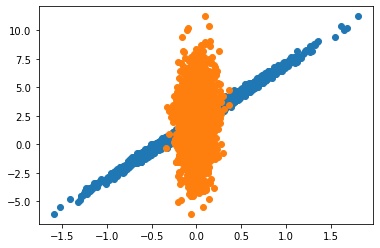

In [3]:
m = 2000
num_feats = 2
X1 = np.random.randn(m)/2
slope1 = 5
intercept = 2

X2 = np.random.randn(m)/10
slope2 = 2
Y = (slope1 * X1 ) + (slope2 * X2) + intercept
# or in matrix form
slope = np.vstack([slope1,slope2])
X = np.vstack([X1,X2]).T

print("slope",slope.shape)
print("X",X.shape)
print("Y",Y.shape)


Y2 = X@slope+intercept
Y2 = Y2.squeeze()

assert np.sum(Y- Y2) == 0

plt.scatter(X[:,0],Y)
plt.scatter(X[:,1],Y)

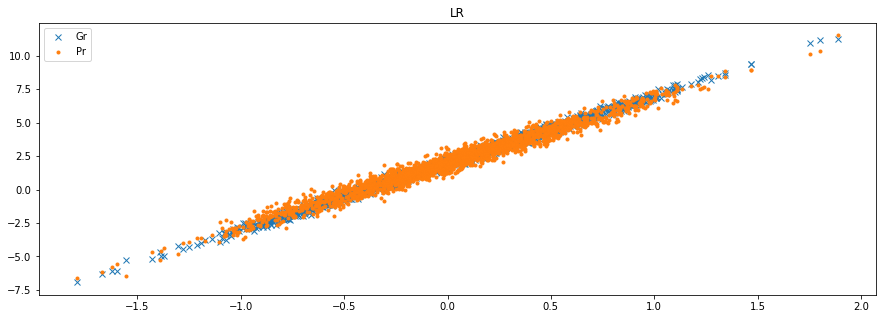

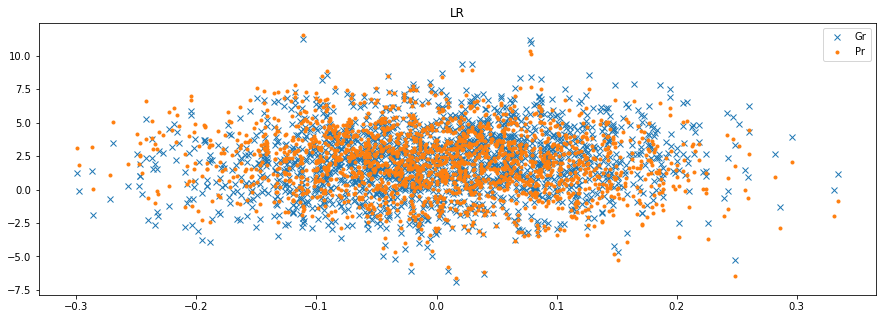

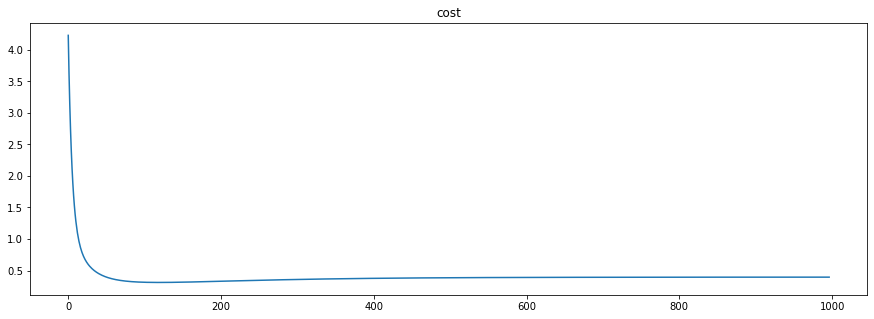

In [4]:
LReg = LinearRegression(iteration=1000,learning_rate=0.1)
w = np.random.randn(num_feats,1)
b = np.random.randn(1,1)

W,B = LReg.fit(X,Y,w,b)
X2 = X.reshape(m,num_feats)
z = X2.dot(W) + B


plt.figure(figsize=(15,5))
plt.plot(X2[:,0],Y,'x')
plt.plot(X2[:,0],z,'.')
plt.legend(['Gr','Pr'])
plt.title('LR')

plt.figure(figsize=(15,5))
plt.plot(X2[:,1],Y,'x')
plt.plot(X2[:,1],z,'.')
plt.legend(['Gr','Pr'])
plt.title('LR')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(LReg.costs)
plt.title('cost')
plt.show()


# Fit a polynomial


In [5]:
m = 2000
num_feats = 3
X1 = np.random.randn(m)/2 + .5
slope1 = 2
intercept = 1

X2 = np.random.randn(m)/2+ .5 
slope2 = -1

X3 = np.random.randn(m)/5+ 0.2
slope3 = 4

Y = (slope1 * X1**2 ) + (slope2 * X2**2)  + (slope3 * X3**2) + intercept
# or in matrix form
slope = np.vstack([slope1,slope2,slope3])
X = np.vstack([X1,X2,X3]).T

print("slope",slope.shape)
print("X",X.shape)
print("Y",Y.shape)


Y2 = (X**2)@slope+intercept
Y2 = Y2.squeeze()

assert np.sum(Y- Y2) == 0

slope (3, 1)
X (2000, 3)
Y (2000,)


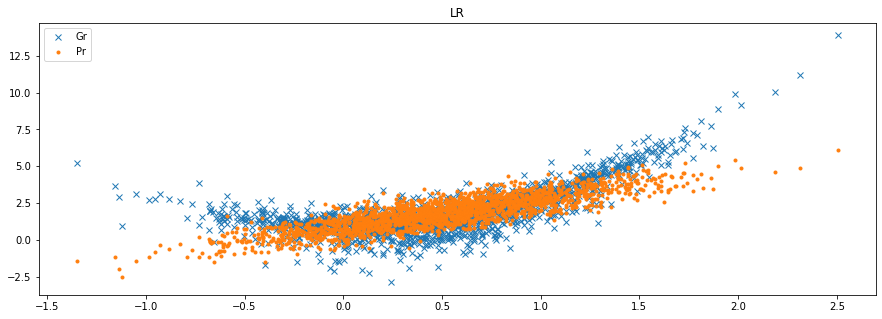

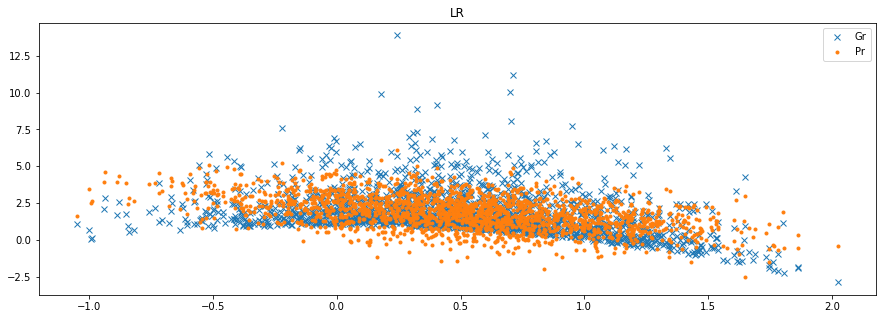

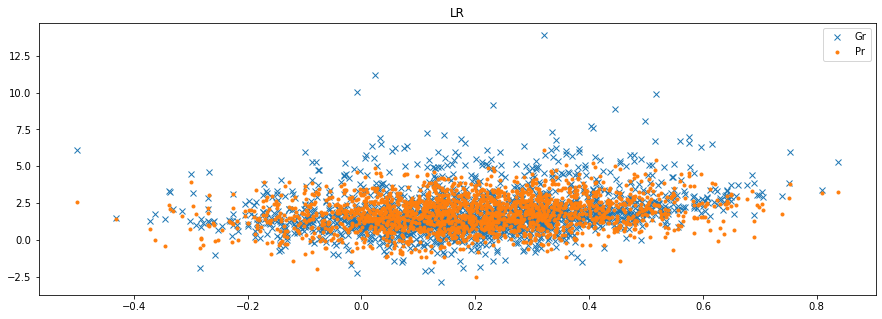

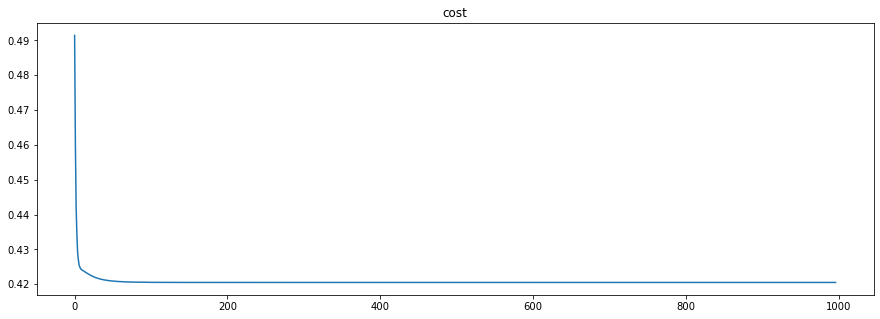

In [6]:
LReg = LinearRegression(iteration=1000,learning_rate=1)
w = np.random.randn(num_feats,1)
b = np.random.randn(1,1)

W,B = LReg.fit(X,Y,w,b)
X2 = X.reshape(m,num_feats)
z = X2.dot(W) + B


plt.figure(figsize=(15,5))
plt.plot(X2[:,0],Y,'x')
plt.plot(X2[:,0],z,'.')
plt.legend(['Gr','Pr'])
plt.title('LR')

plt.figure(figsize=(15,5))
plt.plot(X2[:,1],Y,'x')
plt.plot(X2[:,1],z,'.')
plt.legend(['Gr','Pr'])
plt.title('LR')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(X2[:,2],Y,'x')
plt.plot(X2[:,2],z,'.')
plt.legend(['Gr','Pr'])
plt.title('LR')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(LReg.costs)

plt.title('cost')
plt.show()


# Closed Form 

In [7]:
from numpy.linalg import inv

m = 2000
X = np.random.randn(m)/2
slope = 5
intercept = 0 
gamma = 0.01
Y = (slope * X + intercept)
X = X.reshape(m,1).T
Y = Y.reshape(m,1)


inv_matrix= inv(X@X.T + gamma * np.identity(1))
invX = inv_matrix@X
slope = invX@Y
print(slope.squeeze())

4.999905045981177
